In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
# Daten einlesen aus Github
# Destatis Tabelle 12211-0206 Mikrozensus  

url = "https://raw.githubusercontent.com/Antonijatzele/DSI_Abschlussprojekt/refs/heads/main/Daten/Integration/Destatis_Bildungsabschluss_Mikrozensus_12211-0206_aufbereitet.csv"
df = pd.read_csv(url, sep=";")

In [35]:
df.head()

,Jahr,Migrationsstatus,Geschlecht,Beruflicher Bildungsabschluss,Anzahl,Anzahl_Einheit,Bevölkerung,value_q
0,2021,Deutsche mit eigener Migrationserfahrung,männlich,Bachelor,86,1000,Bevölkerung ab 15 J. in Hauptwohnsitzhaushalten,e
1,2022,Insgesamt,männlich,Master,921,1000,Bevölkerung ab 15 J. in Hauptwohnsitzhaushalten,e
2,2020,Spätaussiedler,Insgesamt,Lehre / Berufsausbildung,1157,1000,Bevölkerung ab 15 J. in Hauptwohnsitzhaushalten,e
3,2022,Mit Migrationshintergrund,Insgesamt,In schulischer oder beruflicher Ausbildung,2164,1000,Bevölkerung ab 15 J. in Hauptwohnsitzhaushalten,e
4,2020,Deutsche ohne eigene Migrationserfahrung,Insgesamt,Lehre / Berufsausbildung,1180,1000,Bevölkerung ab 15 J. in Hauptwohnsitzhaushalten,e


In [36]:
df.nunique()

Jahr                                5
Migrationsstatus                    8
Geschlecht                          3
Beruflicher Bildungsabschluss      12
Anzahl                           1083
Anzahl_Einheit                      1
Bevölkerung                         1
value_q                             3
dtype: int64

In [37]:
df.isnull().sum()

Jahr                              0
Migrationsstatus                  0
Geschlecht                        0
Beruflicher Bildungsabschluss     0
Anzahl                            0
Anzahl_Einheit                    0
Bevölkerung                       0
value_q                          26
dtype: int64

In [38]:
# Zeilen löschen wo null Werte
df = df[df["value_q"].notna()]

In [39]:
df.isnull().sum()

Jahr                             0
Migrationsstatus                 0
Geschlecht                       0
Beruflicher Bildungsabschluss    0
Anzahl                           0
Anzahl_Einheit                   0
Bevölkerung                      0
value_q                          0
dtype: int64

In [40]:
# Datentypen ausgeben
print(df.dtypes)

Jahr                              int64
Migrationsstatus                 object
Geschlecht                       object
Beruflicher Bildungsabschluss    object
Anzahl                           object
Anzahl_Einheit                    int64
Bevölkerung                      object
value_q                          object
dtype: object


In [41]:
# Anzahl in numerischen Datentyp umwandeln
# Erst Kommas oder Punkte als Tausendertrennzeichen entfernen 
df["Anzahl"] = df["Anzahl"].str.replace(".", "", regex=False)
df["Anzahl"] = pd.to_numeric(df["Anzahl"], errors="coerce")

In [42]:
# Geschlecht, Migrationsstatus, berufl. Abschluss in Datentyp category umwandeln
df["Geschlecht"] = df["Geschlecht"].astype("category")
df["Migrationsstatus"] = df["Migrationsstatus"].astype("category")
df["Beruflicher Bildungsabschluss"] = df["Beruflicher Bildungsabschluss"].astype("category")

In [43]:
print(df.dtypes)

Jahr                                int64
Migrationsstatus                 category
Geschlecht                       category
Beruflicher Bildungsabschluss    category
Anzahl                              int64
Anzahl_Einheit                      int64
Bevölkerung                        object
value_q                            object
dtype: object


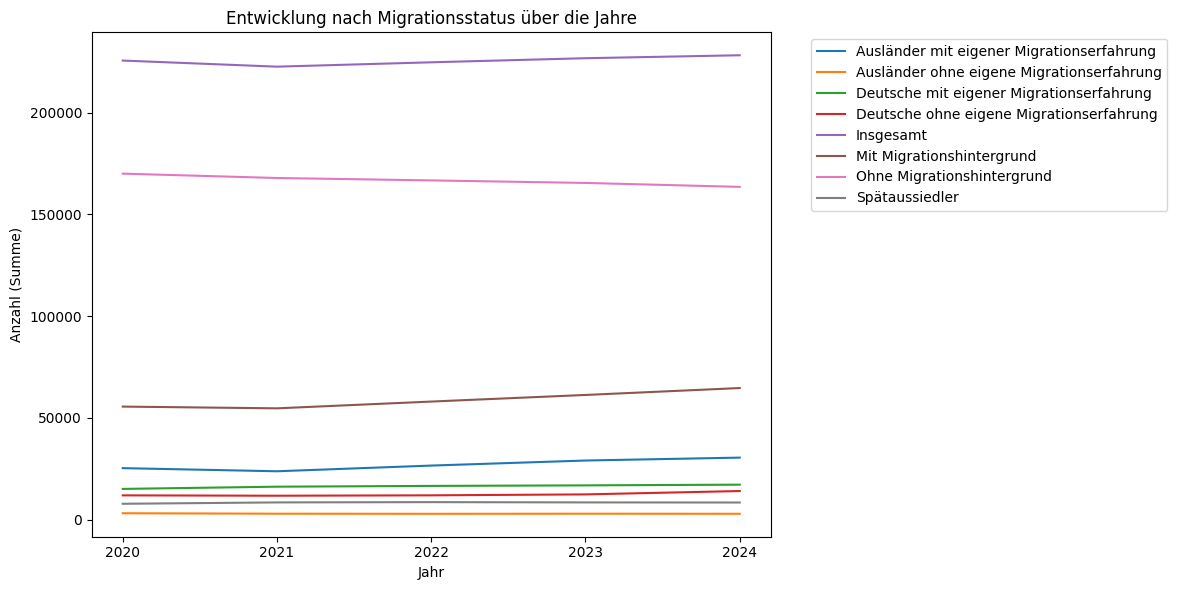

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=df[df["Geschlecht"] == "Insgesamt"],
    x="Jahr", y="Anzahl", hue="Migrationsstatus",
    estimator="sum", errorbar=None
)

plt.title("Entwicklung nach Migrationsstatus über die Jahre")
plt.ylabel("Anzahl (Summe)")

# ✅ Y-Achse: Tausendertrennzeichen (deutsch: Punkt statt Komma)
#plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
#plt.gca().yaxis.set_major_formatter(
#    mticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", "."))
#)

# ✅ X-Achse: Volle Jahre ohne Komma oder Nachkommastellen
jahre = sorted(df["Jahr"].unique())
plt.xticks(ticks=jahre, labels=[str(j) for j in jahre])

plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

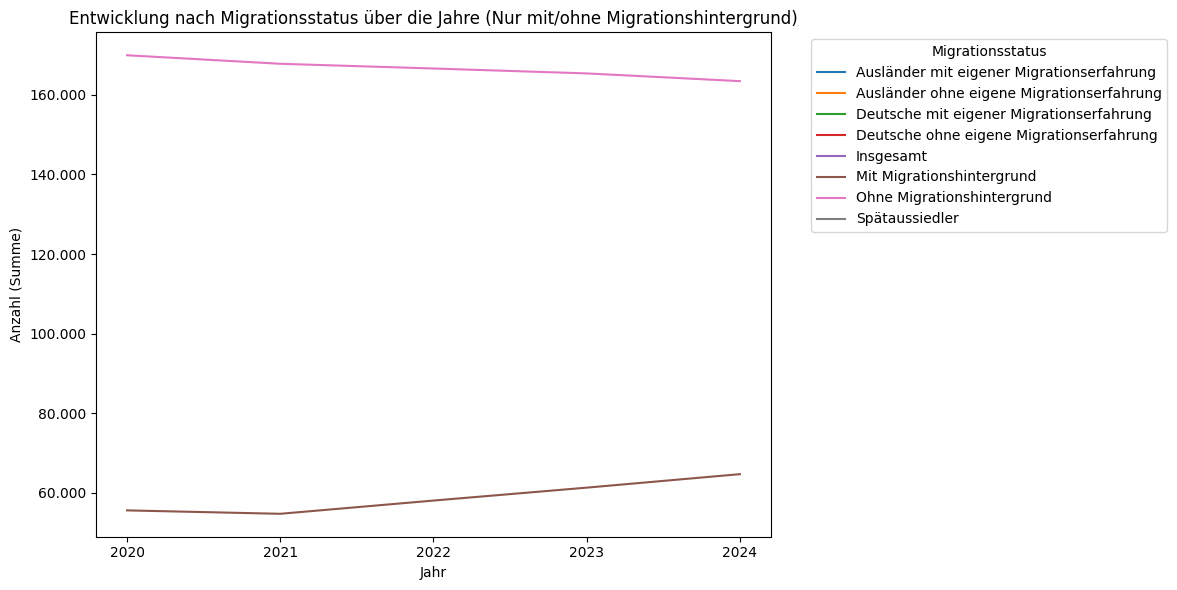

In [45]:
filtered_df = df[
    (df["Geschlecht"] == "Insgesamt") &
    (df["Migrationsstatus"].isin(["Ohne Migrationshintergrund", "Mit Migrationshintergrund"]))
]

plt.figure(figsize=(12, 6))

sns.lineplot(
    data=filtered_df,
    x="Jahr", y="Anzahl", hue="Migrationsstatus",
    estimator="sum", errorbar=None
)

plt.title("Entwicklung nach Migrationsstatus über die Jahre (Nur mit/ohne Migrationshintergrund)")
plt.ylabel("Anzahl (Summe)")

# ✅ Y-Achse: Tausendertrennzeichen mit Punkt
plt.gca().yaxis.set_major_formatter(
    mticker.FuncFormatter(lambda x, _: f"{x:,.0f}".replace(",", "."))
)

# ✅ X-Achse: Volle Jahre ohne Nachkommastellen
jahre = sorted(filtered_df["Jahr"].unique())
plt.xticks(ticks=jahre, labels=[str(j) for j in jahre])

plt.legend(title="Migrationsstatus", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

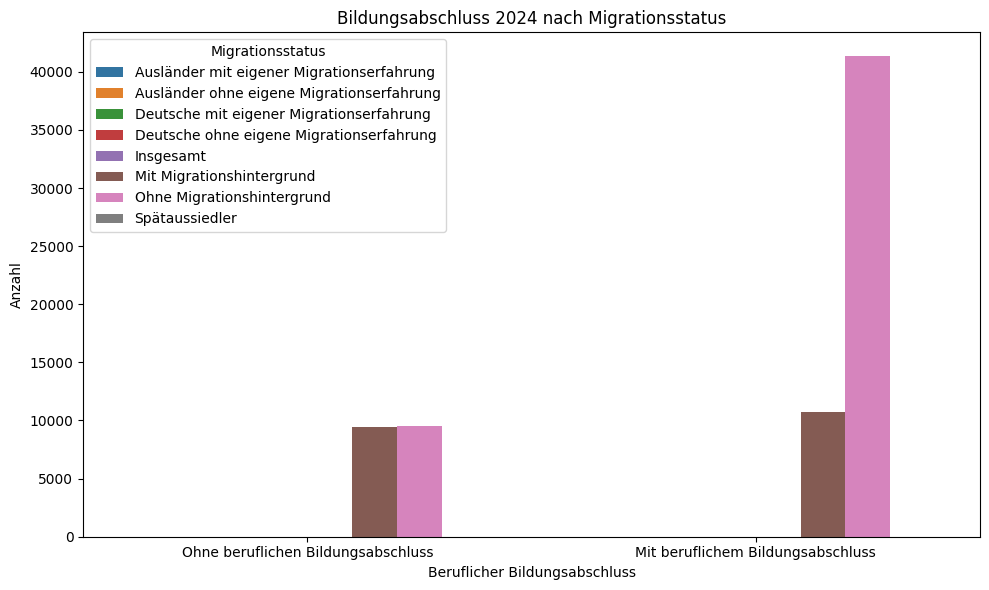

In [48]:
# Nur relevante Daten auswählen
df_plot = df[
    (df["Jahr"] == 2024) &
    (df["Beruflicher Bildungsabschluss"].isin([
        "Mit beruflichem Bildungsabschluss", 
        "Ohne beruflichen Bildungsabschluss"
    ])) &
    (df["Migrationsstatus"].isin([
        "Mit Migrationshintergrund", 
        "Ohne Migrationshintergrund"
    ])) &
    (df["Geschlecht"] == "Insgesamt")
].copy()  # Copy gegen mögliche SettingWithCopyWarning

# 'Anzahl' sicher in numerisch umwandeln
df_plot["Anzahl"] = pd.to_numeric(df_plot["Anzahl"], errors="coerce")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_plot,
    x="Beruflicher Bildungsabschluss",
    y="Anzahl",
    hue="Migrationsstatus",
    order=["Ohne beruflichen Bildungsabschluss", "Mit beruflichem Bildungsabschluss"]  # Gewünschte Reihenfolge
)
plt.title("Bildungsabschluss 2024 nach Migrationsstatus")
plt.ylabel("Anzahl")
plt.xlabel("Beruflicher Bildungsabschluss")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

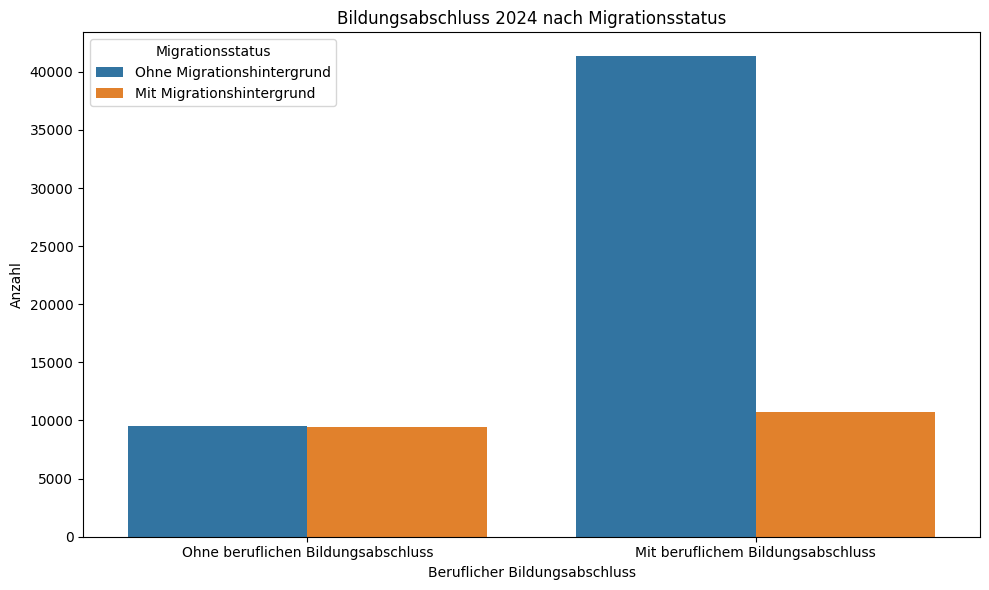

In [49]:
# Optional: Leerzeichen entfernen
df["Beruflicher Bildungsabschluss"] = df["Beruflicher Bildungsabschluss"].str.strip()
df["Migrationsstatus"] = df["Migrationsstatus"].str.strip()

# Daten filtern
df_plot = df[
    (df["Jahr"] == 2024) &
    (df["Beruflicher Bildungsabschluss"].isin([
        "Mit beruflichem Bildungsabschluss", 
        "Ohne beruflichen Bildungsabschluss"
    ])) &
    (df["Migrationsstatus"].isin([
        "Mit Migrationshintergrund", 
        "Ohne Migrationshintergrund"
    ])) &
    (df["Geschlecht"] == "Insgesamt")
].copy()

# Anzahl in numerisch
df_plot["Anzahl"] = pd.to_numeric(df_plot["Anzahl"], errors="coerce")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_plot,
    x="Beruflicher Bildungsabschluss",
    y="Anzahl",
    hue="Migrationsstatus",
    order=["Ohne beruflichen Bildungsabschluss", "Mit beruflichem Bildungsabschluss"]
)
plt.title("Bildungsabschluss 2024 nach Migrationsstatus")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

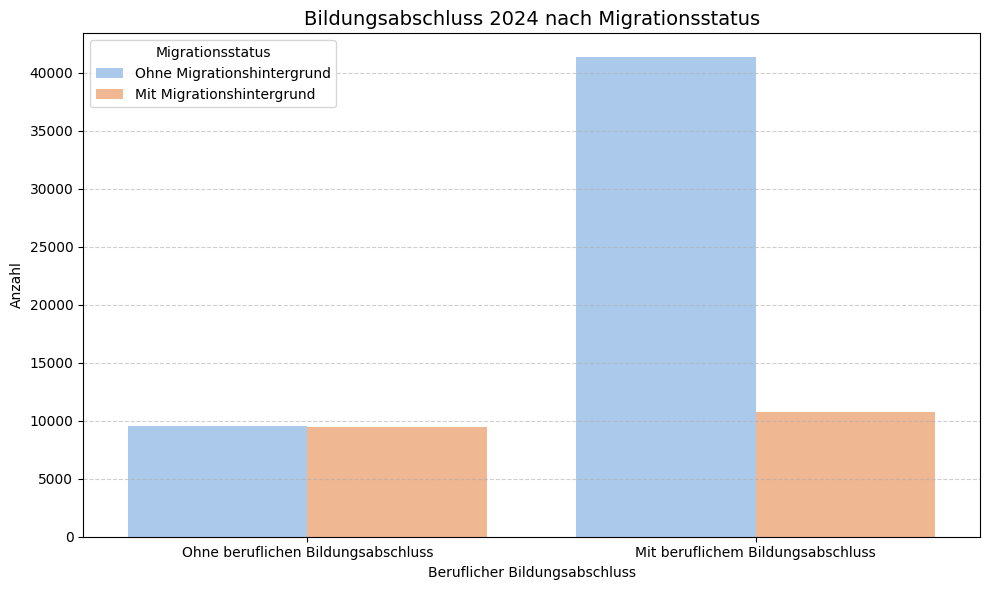

In [52]:
# Schritt 1: Trimmen (sicherstellen, dass es keine Leerzeichenprobleme gibt)
df["Beruflicher Bildungsabschluss"] = df["Beruflicher Bildungsabschluss"].str.strip()
df["Migrationsstatus"] = df["Migrationsstatus"].str.strip()

# Schritt 2: Daten filtern
df_plot = df[
    (df["Jahr"] == 2024) &
    (df["Beruflicher Bildungsabschluss"].isin([
        "Mit beruflichem Bildungsabschluss", 
        "Ohne beruflichen Bildungsabschluss"
    ])) &
    (df["Migrationsstatus"].isin([
        "Mit Migrationshintergrund", 
        "Ohne Migrationshintergrund"
    ])) &
    (df["Geschlecht"] == "Insgesamt")
].copy()

# Schritt 3: 'Anzahl' in numerisch umwandeln
df_plot["Anzahl"] = pd.to_numeric(df_plot["Anzahl"], errors="coerce")

# Schritt 4: Farbpalette definieren (modern, angenehm)
#custom_palette = {
#    "Mit Migrationshintergrund": "#4C72B0",       # Blau
#    "Ohne Migrationshintergrund": "#55A868"       # Grün
#}

# Schritt 5: Plot zeichnen
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_plot,
    x="Beruflicher Bildungsabschluss",
    y="Anzahl",
    hue="Migrationsstatus",
    palette="pastel",
    order=["Ohne beruflichen Bildungsabschluss", "Mit beruflichem Bildungsabschluss"]
)

# Schritt 6: Styling
plt.title("Bildungsabschluss 2024 nach Migrationsstatus", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Migrationsstatus")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

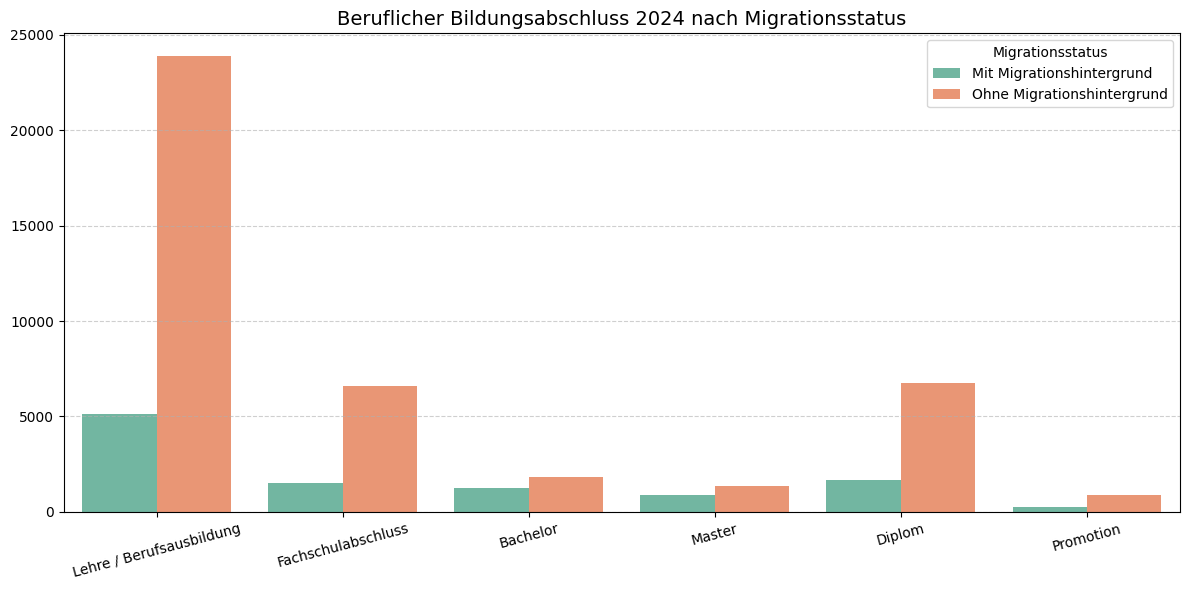

In [59]:

# Schritt 1: Trimmen der Strings
df["Beruflicher Bildungsabschluss"] = df["Beruflicher Bildungsabschluss"].str.strip()
df["Migrationsstatus"] = df["Migrationsstatus"].str.strip()

# Schritt 2: Daten filtern
auswahl_abschluesse = [
    "Bachelor",
    "Master",
    "Diplom",
    "Promotion",
    "Lehre / Berufsausbildung",
    "Fachschulabschluss"
]

df_plot = df[
    (df["Jahr"] == 2024) &
    (df["Beruflicher Bildungsabschluss"].isin(auswahl_abschluesse)) &
    (df["Migrationsstatus"].isin(["Mit Migrationshintergrund", "Ohne Migrationshintergrund"])) &
    (df["Geschlecht"] == "Insgesamt")
].copy()

# Schritt 3: 'Anzahl' konvertieren
df_plot["Anzahl"] = pd.to_numeric(df_plot["Anzahl"], errors="coerce")

# Schritt 4: Sortierreihenfolge für X-Achse festlegen
order_abschluesse = [
    "Lehre / Berufsausbildung",
    "Fachschulabschluss",
    "Bachelor",
    "Master",
    "Diplom",
    "Promotion"
]

# Schritt 5: Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_plot,
    x="Beruflicher Bildungsabschluss",
    y="Anzahl",
    hue="Migrationsstatus",
    palette="Set2",
    order=order_abschluesse
)

# Schritt 6: Styling
plt.title("Beruflicher Bildungsabschluss 2024 nach Migrationsstatus", fontsize=14)
plt.xticks(rotation=15)
plt.xlabel("")  # x-Achsenbeschriftung entfernen
plt.ylabel("")  # y-Achsenbeschriftung entfernen
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Migrationsstatus")
plt.tight_layout()
plt.show()

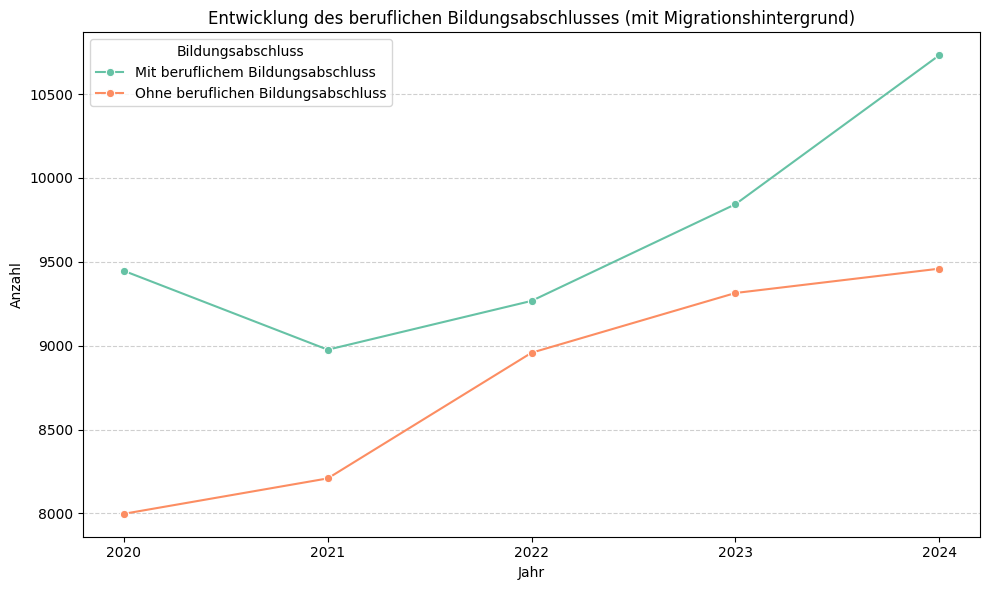

In [68]:
# Schritt 1: Strings säubern
df["Beruflicher Bildungsabschluss"] = df["Beruflicher Bildungsabschluss"].str.strip()
df["Migrationsstatus"] = df["Migrationsstatus"].str.strip()

# Schritt 2: Daten filtern
df_line = df[
    (df["Migrationsstatus"] == "Mit Migrationshintergrund") &
    (df["Beruflicher Bildungsabschluss"].isin([
        "Mit beruflichem Bildungsabschluss",
        "Ohne beruflichen Bildungsabschluss"
    ])) &
    (df["Geschlecht"].str.lower() == "insgesamt")
].copy()

# Schritt 3: 'Anzahl' in numerisch umwandeln
df_line["Anzahl"] = pd.to_numeric(df_line["Anzahl"], errors="coerce")

# Schritt 4: 'Jahr' sicherstellen als ganze Zahl (int)
df_line["Jahr"] = pd.to_numeric(df_line["Jahr"], errors="coerce")
df_line = df_line.dropna(subset=["Jahr"])
df_line["Jahr"] = df_line["Jahr"].astype(int)

# Schritt 5: Linienplot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_line,
    x="Jahr",
    y="Anzahl",
    hue="Beruflicher Bildungsabschluss",
    palette="Set2",
    marker="o"
)

# Styling
plt.title("Entwicklung des beruflichen Bildungsabschlusses (mit Migrationshintergrund)")
#plt.ylabel("Anzahl")
#plt.xlabel("Jahr")
plt.xticks(sorted(df_line["Jahr"].unique()))  # nur volle Jahre anzeigen
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.legend(title="Bildungsabschluss")
plt.tight_layout()
plt.show()